In [ ]:
# Data loading, preprocessing, and wrangling

### Importing Libraries 

In [ ]:
import pandas as pd              # for data wrangling and data manipulation
import matplotlib.pyplot as plt  # for visualisation
import numpy as np               # for numerical python and working with arrays
from scipy.io import loadmat     # for working with Matlab objects 

### Defining gcparser(mat) function that extracts data from a Matlab formatted GCMS object loaded by sio.loadmat and wrangles it into Pandas DataFrame

Parameters:
* mat (dict): Dictionary produced by loading a file using sio.loadmat

Return:
* DataFrame: Total ion counts (TIC) arranged by samples (columns) and
               retention time (rows)

In [6]:
def gcparser(mat):
    data = np.transpose(mat['XTIC'])  #XTIC is a matix of measured values from GC-MS
    sample_names = mat['SAM']  # SAM contains the name of each sample
    sample_names = np.hstack(np.hstack(sample_names)).tolist()  # convert nested numpy arrays into a list
    RT = mat['RT']  # RT is retention time (in minutes)
    RT = np.hstack(np.hstack(RT)).tolist()  # convert nested numpy arrays into a list
    y = mat['CLASS']  #CLASS is the diagnosis of each sample (in this casse 1=control; 2=CD)
    y = np.hstack(y).tolist()  # convert nested numpy arrays into a list
    # put pieces back together in a pandas dataframe
    return pd.DataFrame(data, columns=sample_names, index=RT)

### Loading and wrangling the GCMS data


In [10]:
# Initialising as empty dictionaries for the mat objects
bl_cdvsctrl = {}
br_cdvsctrl = {}
fa_cdvsctrl = {}
ur_cdvsctrl = {}

In [ ]:
# load the .mat files as a dictionary-like objects
# appendmat=False: means the function will not automatically
# append .mat to the filename (as it is already there)

loadmat("data_for_assignment/blood/BWG_BL_CDvCTRL.mat", mdict=bl_cdvsctrl, appendmat=False)
loadmat("data_for_assignment/breath/BWG_BR_CDvCTRL.mat", mdict=br_cdvsctrl, appendmat=False)
loadmat("data_for_assignment/faecal/BWG_FA_CDvCTRL.mat", mdict=fa_cdvsctrl, appendmat=False)
loadmat("data_for_assignment/urine/BWG_UR_CDvCTRL.mat", mdict=ur_cdvsctrl, appendmat=False)

### Wrangling the dictionaries cdvsctrl into a Pandas dataframe using gcparser(defined above)



In [15]:
## For Blood Samples
bl_df = gcparser(bl_cdvsctrl)

## For Breath Samples
br_df = gcparser(br_cdvsctrl)

## For Faecal Samples
fa_df = gcparser(fa_cdvsctrl)

## For Urine Samples
ur_df = gcparser(ur_cdvsctrl)

In [17]:
# Adding a new row indicating "CTRL" or "CD"
bl_df.loc["Sample_Type"] = bl_df.columns.map(lambda col: "0" if "_CTRL" in col else "1")

In [21]:
# Creating a list of disease states 
bl_sample_type = bl_df.loc["Sample_Type"].tolist() 

In [23]:
### Repeating for each Sample Type ###

In [25]:
br_df.loc["Sample_Type"] = br_df.columns.map(lambda col: "0" if "_CTRL" in col else "1")

In [27]:
br_sample_type = br_df.loc["Sample_Type"].tolist()

In [29]:
fa_df.loc["Sample_Type"] = fa_df.columns.map(lambda col: "0" if "_CTRL" in col else "1")

In [31]:
fa_sample_type = fa_df.loc["Sample_Type"].tolist()

In [33]:
ur_df.loc["Sample_Type"] = ur_df.columns.map(lambda col: "0" if "_CTRL" in col else "1")

In [35]:
ur_sample_type = ur_df.loc["Sample_Type"].tolist()

### Subsetting the data by sample type (ctrl and cd) for each saple type

In [39]:
bl_ctrl_subset = bl_df.iloc[:-1, :].filter(like='_CTRL', axis=1)
bl_cd_subset = bl_df.iloc[:-1, :].filter(like='_CD', axis=1)

In [43]:
br_ctrl_subset = br_df.iloc[:-1, :].filter(like='_CTRL', axis=1)
br_cd_subset = br_df.iloc[:-1, :].filter(like='_CD', axis=1)

In [45]:
fa_ctrl_subset = fa_df.iloc[:-1, :].filter(like='_CTRL', axis=1)
fa_cd_subset = fa_df.iloc[:-1, :].filter(like='_CD', axis=1)

In [47]:
ur_ctrl_subset = ur_df.iloc[:-1, :].filter(like='_CTRL', axis=1)
ur_cd_subset = ur_df.iloc[:-1, :].filter(like='_CD', axis=1)

# Exploratory data analysis to visualise the relationships between the samples

### Plotting the distribution of the disease states in each sample type

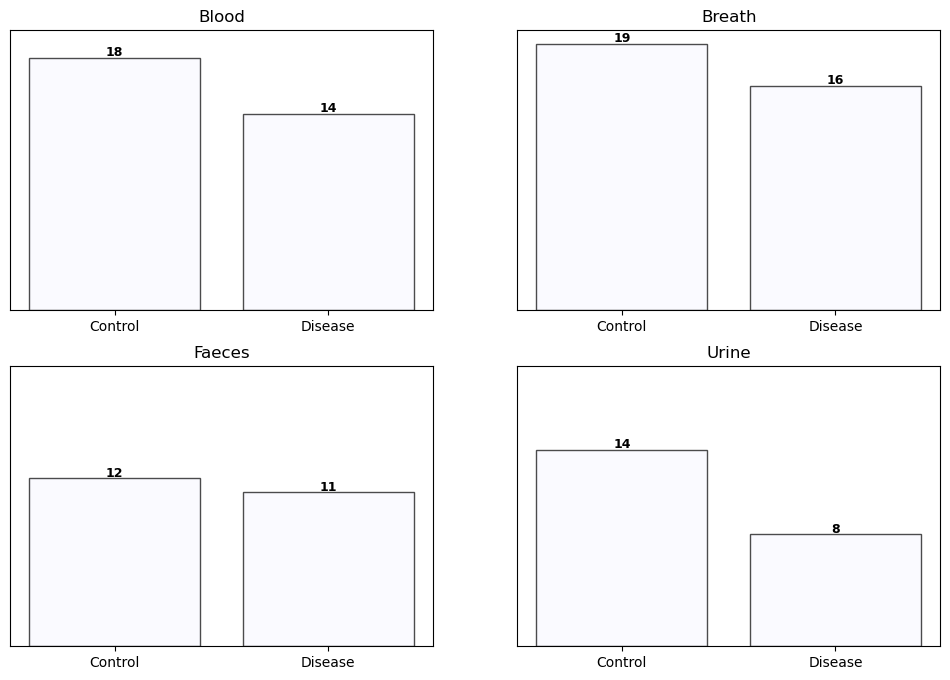

In [53]:
# Create a 2x2 grid for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

dataframes = [bl_df, br_df, fa_df, ur_df]
titles = ["Blood", "Breath", "Faeces", "Urine"]

# Loop through axes, dataframes, and titles to create bar plots for each clinical sample type
for ax, df, title in zip(axes.flatten(), dataframes, titles):
    # Count the occurrences of each Sample_Type (disease state) in the current dataframe
    counts = df.loc["Sample_Type"].value_counts()
    
    # Create a bar plot on the current axis
    bars = ax.bar(
        counts.index,         # The categories on the x-axis (different Sample_Types)
        counts.values,        # The count values for each category
        color="ghostwhite",     # Setting the bar color 
        edgecolor="black",
        alpha=0.7,            # Adjusting the opacity to make the color less bright
    )
    
    # Adding count labels on top of each bar for clarity
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Position the text in the middle of the bar
            bar.get_height() + 0.1,            # Position the text slightly above the top of the bar
            f"{int(bar.get_height())}",        # Convert the bar height (count) to an integer and display it
            ha="center",                       # Center-align the text horizontally
            fontsize=9,                        # Set the font size for the text
            weight="bold"                      # Make the font bold for better visibility
        ) 

    ax.set_title(title, fontsize=12)                         # title for each sample type
    ax.set_xticks([0, 1])                                    # x axis organised as controls on the left disease on the right
    ax.set_yticks([])                                        # removed the values on the y axis
    ax.set_xticklabels(["Control", "Disease"], fontsize=10)  # creating labels for the disease states


# Saving and displaying the figure
plt.savefig("sample_distribution_unified_color.png", dpi=300) # 300 is a good quality for reports
plt.show()


# Chromatograms

# Blood

### Crohn's Disease Samples

Text(0, 0.5, 'Ion Count')

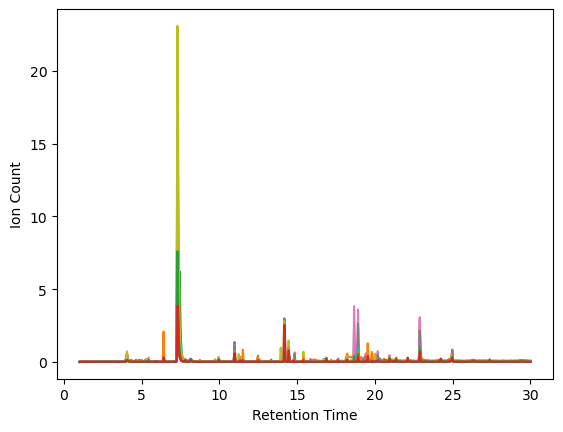

In [60]:
# creating a variable for x axis values - which will be the time (transposed df columns)
bl_cd_x_data = bl_cd_subset.T.columns
# creating a variable for the values of the columns
bl_cd_y_data = bl_cd_subset.values

# plotting the data 
plt.plot(bl_cd_x_data, bl_cd_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

### Control Samples

Text(0, 0.5, 'Ion Count')

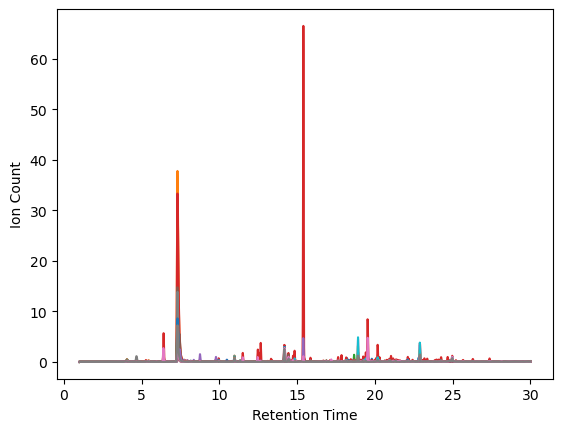

In [63]:
bl_ctrl_x_data = bl_ctrl_subset.T.columns
bl_ctrl_y_data = bl_ctrl_subset.values

plt.plot(bl_ctrl_x_data, bl_ctrl_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

# Breath

### Crohn's Disease Samples

Text(0, 0.5, 'Ion Count')

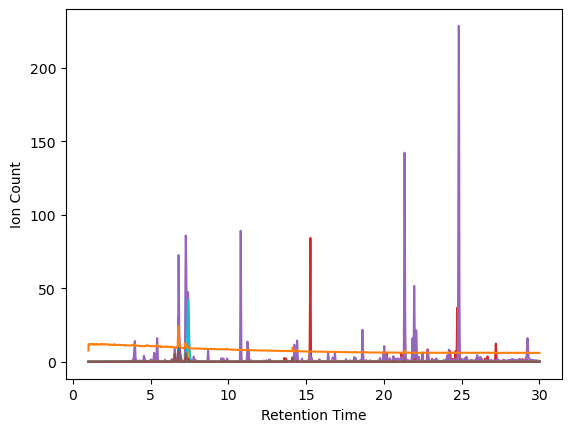

In [67]:
br_cd_x_data = br_cd_subset.T.columns
br_cd_y_data = br_cd_subset.values

plt.plot(br_cd_x_data, br_cd_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

### Control Samples

Text(0, 0.5, 'Ion Count')

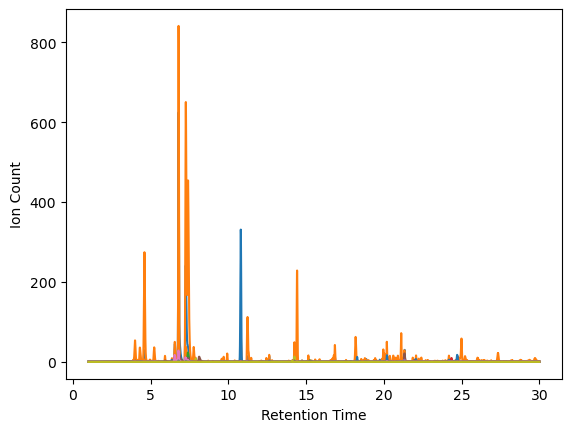

In [70]:
br_ctrl_x_data = br_ctrl_subset.T.columns
br_ctrl_y_data = br_ctrl_subset.values

plt.plot(br_ctrl_x_data, br_ctrl_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

# Faeces

### Crohn's Disease Samples

Text(0, 0.5, 'Ion Count')

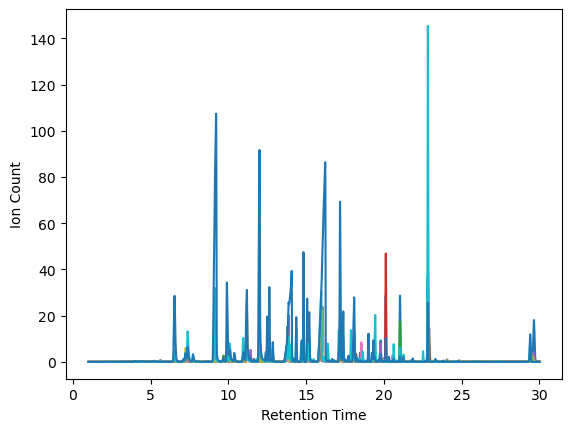

In [74]:
fa_cd_x_data = fa_cd_subset.T.columns
fa_cd_y_data = fa_cd_subset.values

plt.plot(fa_cd_x_data, fa_cd_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

### Control Samples

Text(0, 0.5, 'Ion Count')

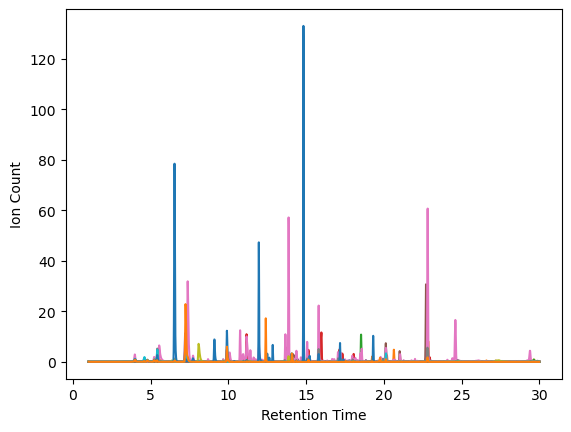

In [77]:
fa_ctrl_x_data = fa_ctrl_subset.T.columns
fa_ctrl_y_data = fa_ctrl_subset.values

plt.plot(fa_ctrl_x_data, fa_ctrl_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

### Faeces again, but this time I was intersted how "W1072_FA_CD"(the only sample that was later wrongly classified by svm in the training data) differs from other samples

Text(0, 0.5, 'Ion Count')

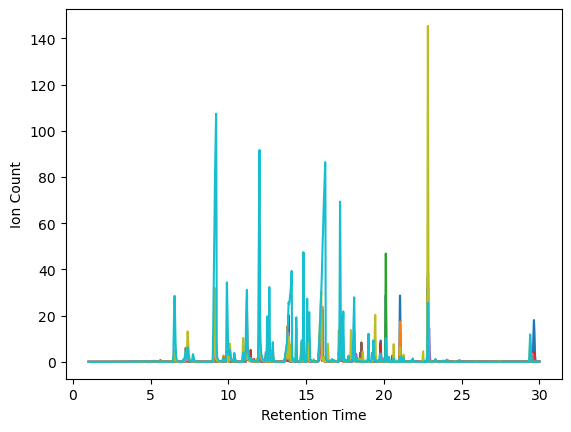

In [81]:
# Everything but the "W1072_FA_CD"
fa_cd_x_data1 = fa_cd_subset.T.columns
fa_cd_y_data1 = fa_cd_subset.drop(fa_cd_subset.columns[1], axis=1).values

plt.plot(fa_cd_x_data1, fa_cd_y_data1)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")


Text(0, 0.5, 'Ion Count')

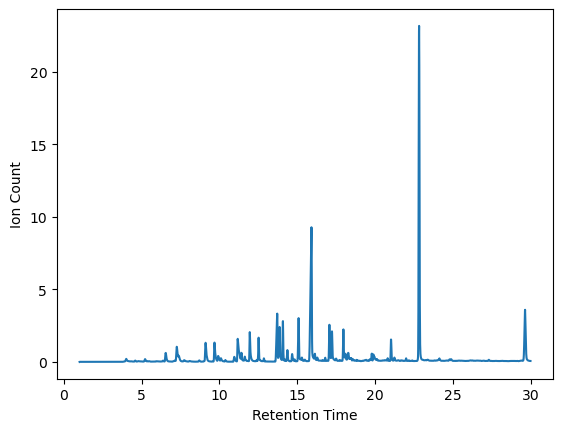

In [83]:
# W1072_FA_CD
fa_cd_x_data2 = fa_cd_subset.T.columns
fa_cd_y_data2 = fa_cd_subset["W1072_FA_CD"]
plt.plot(fa_cd_x_data2, fa_cd_y_data2)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

# Urine

### Crohn's Disease Samples

Text(0, 0.5, 'Ion Count')

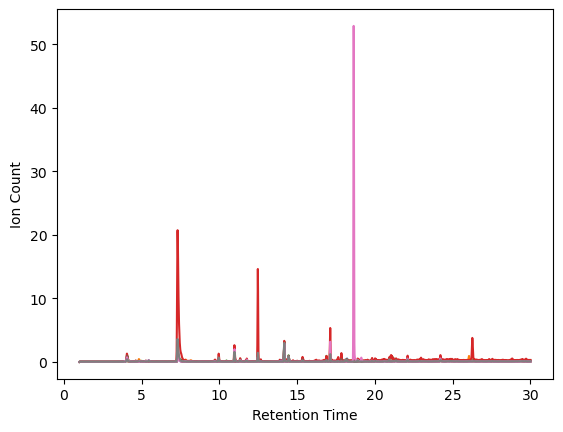

In [88]:
ur_cd_x_data = ur_cd_subset.T.columns
ur_cd_y_data = ur_cd_subset.values

plt.plot(ur_cd_x_data, ur_cd_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

### Control Samples

Text(0, 0.5, 'Ion Count')

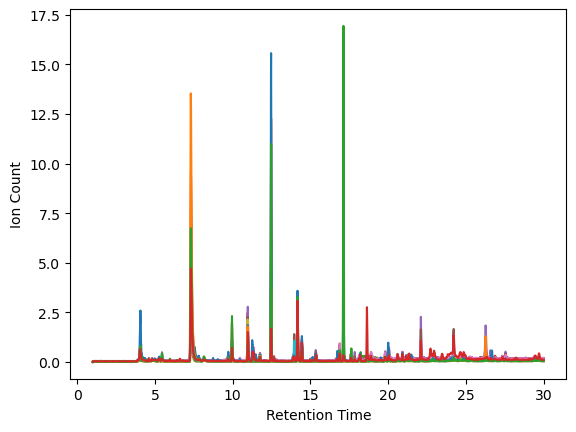

In [91]:
ur_ctrl_x_data = ur_ctrl_subset.T.columns
ur_ctrl_y_data = ur_ctrl_subset.values

plt.plot(ur_ctrl_x_data, ur_ctrl_y_data)
plt.xlabel("Retention Time")  
plt.ylabel("Ion Count")

# Combined Chromatograms

### This section is building upon the code from the single chromatograms

# BLOOD

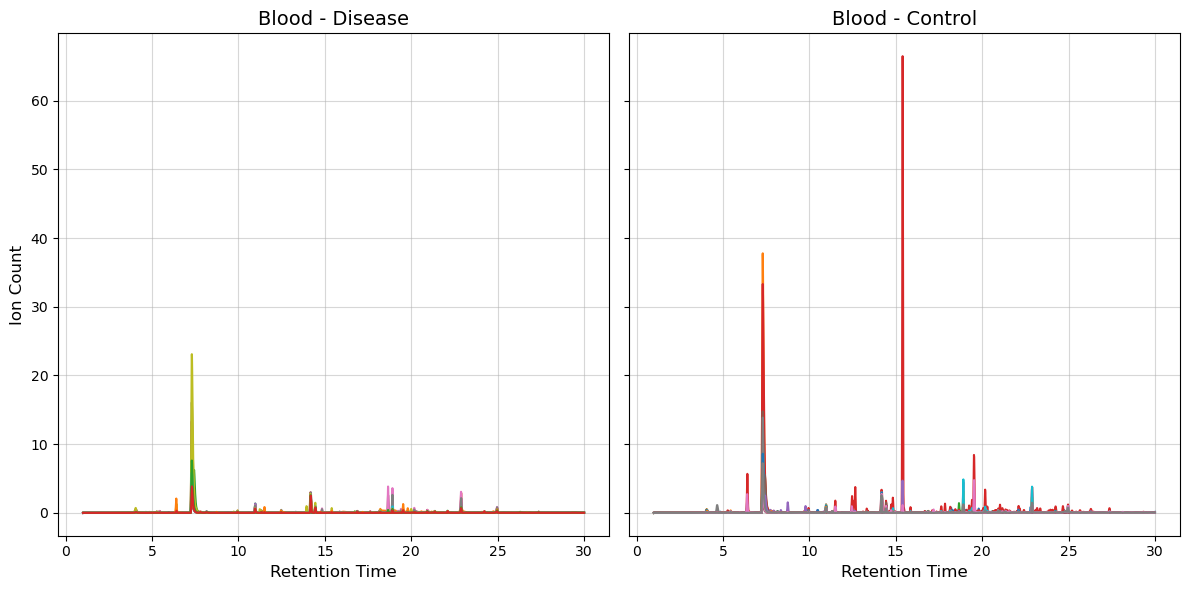

In [96]:

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Disease Sample (Left Plot)
axes[0].plot(bl_cd_x_data, bl_cd_y_data)
axes[0].set_title("Blood - Disease", fontsize=14)
axes[0].set_xlabel("Retention Time", fontsize=12)
axes[0].set_ylabel("Ion Count", fontsize=12)
axes[0].grid(alpha=0.5)

# Plot Control Sample (Right Plot)
axes[1].plot(bl_ctrl_x_data, bl_ctrl_y_data)
axes[1].set_title("Blood - Control", fontsize=14)
axes[1].set_xlabel("Retention Time", fontsize=12)
axes[1].grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save and display the figure
plt.savefig("blood_disease_vs_control.png", dpi=300)
plt.show()


# BREATH

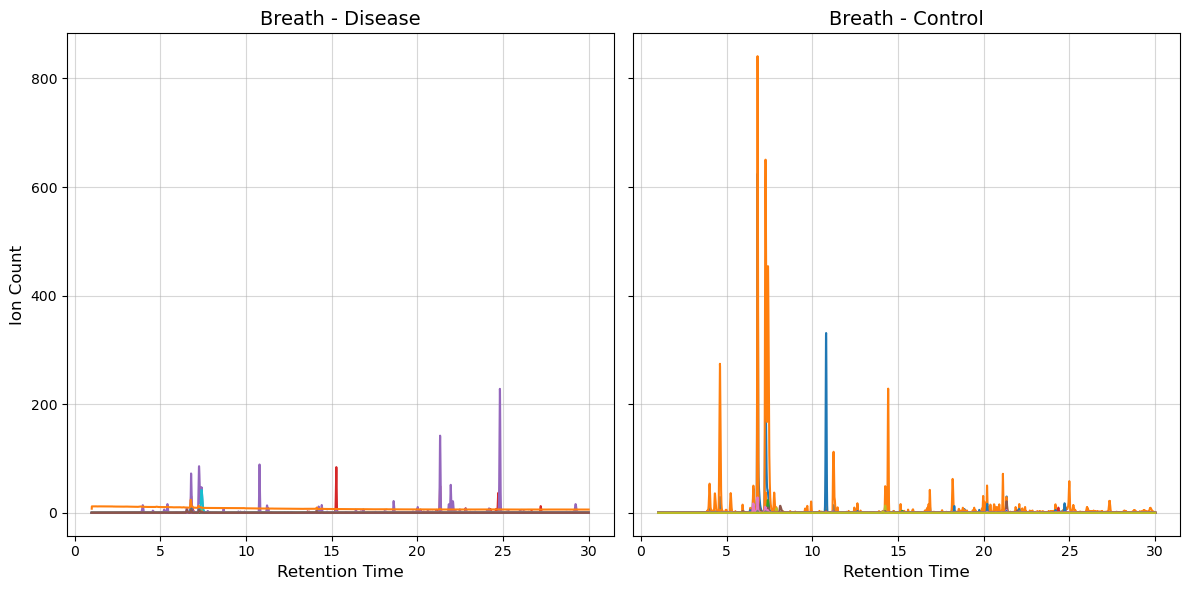

In [100]:
# Create a figure for Breath samples
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Disease Sample (Left Plot)
axes[0].plot(br_cd_x_data, br_cd_y_data)
axes[0].set_title("Breath - Disease", fontsize=14)
axes[0].set_xlabel("Retention Time", fontsize=12)
axes[0].set_ylabel("Ion Count", fontsize=12)
axes[0].grid(alpha=0.5)

# Plot Control Sample (Right Plot)
axes[1].plot(br_ctrl_x_data, br_ctrl_y_data)
axes[1].set_title("Breath - Control", fontsize=14)
axes[1].set_xlabel("Retention Time", fontsize=12)
axes[1].grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save and display the figure
plt.savefig("breath_disease_vs_control.png", dpi=300)
plt.show()


# FAECES

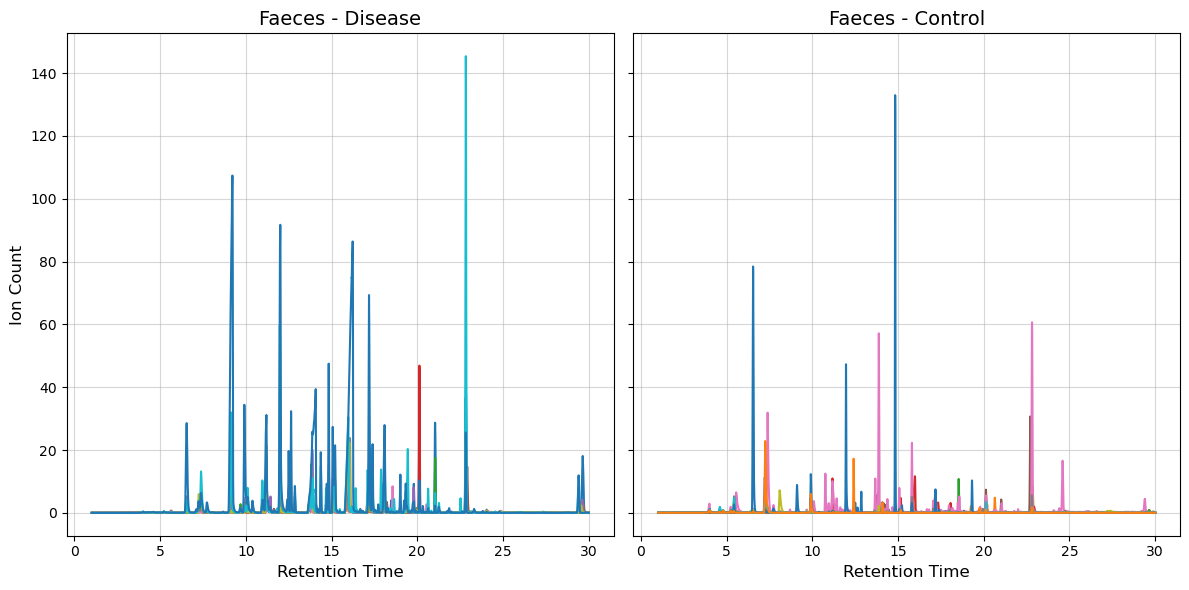

In [104]:
# Create a figure for Faeces samples
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Disease Sample (Left Plot)
axes[0].plot(fa_cd_x_data, fa_cd_y_data)
axes[0].set_title("Faeces - Disease", fontsize=14)
axes[0].set_xlabel("Retention Time", fontsize=12)
axes[0].set_ylabel("Ion Count", fontsize=12)
axes[0].grid(alpha=0.5)

# Plot Control Sample (Right Plot)
axes[1].plot(fa_ctrl_x_data, fa_ctrl_y_data)
axes[1].set_title("Faeces - Control", fontsize=14)
axes[1].set_xlabel("Retention Time", fontsize=12)
axes[1].grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save and display the figure
plt.savefig("faeces_disease_vs_control.png", dpi=300)
plt.show()


# URINE

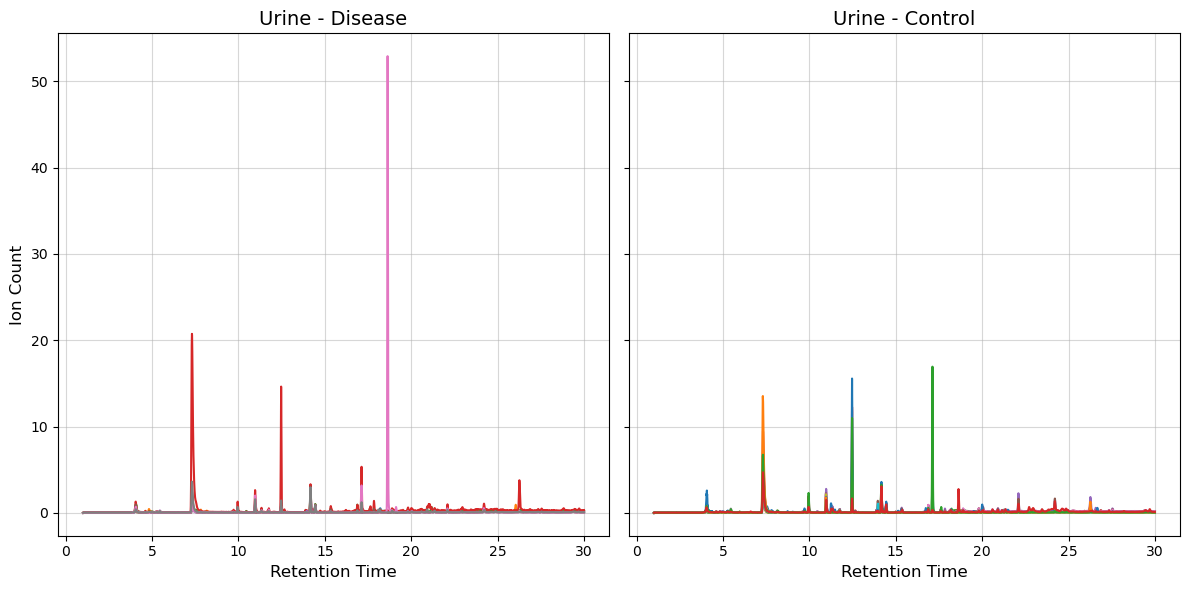

In [108]:
# Create a figure for Urine samples
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Disease Sample (Left Plot)
axes[0].plot(ur_cd_x_data, ur_cd_y_data)
axes[0].set_title("Urine - Disease", fontsize=14)
axes[0].set_xlabel("Retention Time", fontsize=12)
axes[0].set_ylabel("Ion Count", fontsize=12)
axes[0].grid(alpha=0.5)

# Plot Control Sample (Right Plot)
axes[1].plot(ur_ctrl_x_data, ur_ctrl_y_data)
axes[1].set_title("Urine - Control", fontsize=14)
axes[1].set_xlabel("Retention Time", fontsize=12)
axes[1].grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save and display the figure
plt.savefig("urine_disease_vs_control.png", dpi=300)
plt.show()
